In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
import warnings

warnings.filterwarnings('ignore')

In [2]:
sales_horizon = pd.read_excel('sales_horizon.xlsx')
sales_pasifik = pd.read_excel('sales_pasifik.xlsx')
aktivite = pd.read_excel('aktivite.xlsx')
aktivite_pasifik = pd.read_excel('Data/Pasifik Aktivite Datası (2018-2021).xlsx')

# Horizon

In [3]:
sales_horizon.head()

,Yıl,Çeyrek,Ay,Saha Müşteri Grup,Ana Kategori Adı,Kategori Adı,Marka Adı,Ürün Kodu,Ürün Adı (Mobis),Koli İçi Adet,Koli,KG,TL
0,2021,1,1,Diğer,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11601,ALTINBAŞAK YULAFLI 46GR 5Lİ,18,89,368.460,6824.52
1,2021,1,1,Diğer,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11604,ALTINBAŞAK YULAFLI 46GRX24,24,803,886.512,17922.96
2,2021,1,1,Diğer,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11609,ALTINBAŞAK ÇÖREKOTLU VE KİNOALI 40GRx24,24,1324,1271.040,35271.36
3,2021,1,1,Diğer,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11802,A.BAŞAK Ç.OTLU KİN.5x40Gx18,18,107,385.200,9976.68
4,2021,1,1,Diğer,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,12509,A.BAŞAK HUMUSLU 45Gx20,20,285,256.500,8436.00


In [4]:
sales_horizon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77115 entries, 0 to 77114
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yıl                77115 non-null  int64  
 1   Çeyrek             77115 non-null  int64  
 2   Ay                 77115 non-null  int64  
 3   Saha Müşteri Grup  77115 non-null  object 
 4   Ana Kategori Adı   77115 non-null  object 
 5   Kategori Adı       77115 non-null  object 
 6   Marka Adı          77115 non-null  object 
 7   Ürün Kodu          77115 non-null  int64  
 8   Ürün Adı (Mobis)   77115 non-null  object 
 9   Koli İçi Adet      77115 non-null  int64  
 10  Koli               77115 non-null  int64  
 11  KG                 77115 non-null  float64
 12  TL                 77115 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 7.6+ MB


In [5]:
sales_horizon.nunique()

Yıl                      4
Çeyrek                   4
Ay                      12
Saha Müşteri Grup        5
Ana Kategori Adı         3
Kategori Adı             9
Marka Adı               82
Ürün Kodu             1117
Ürün Adı (Mobis)      1116
Koli İçi Adet           46
Koli                 14787
KG                   46379
TL                   52342
dtype: int64

In [6]:
sales_horizon.rename(columns = {'Saha Müşteri Grup' : 'Grup',
                                'Ana Kategori Adı'  : 'AnaKategori',
                                'Kategori Adı'      : 'Kategori',
                                'Marka Adı'         : 'Marka',
                                'Ürün Kodu'         : 'Kod',
                                'Ürün Adı (Mobis)'  : 'Urun',
                                'Koli İçi Adet'     : 'Adet'}, inplace=True)

In [7]:
sales_horizon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77115 entries, 0 to 77114
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yıl          77115 non-null  int64  
 1   Çeyrek       77115 non-null  int64  
 2   Ay           77115 non-null  int64  
 3   Grup         77115 non-null  object 
 4   AnaKategori  77115 non-null  object 
 5   Kategori     77115 non-null  object 
 6   Marka        77115 non-null  object 
 7   Kod          77115 non-null  int64  
 8   Urun         77115 non-null  object 
 9   Adet         77115 non-null  int64  
 10  Koli         77115 non-null  int64  
 11  KG           77115 non-null  float64
 12  TL           77115 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 7.6+ MB


<AxesSubplot:xlabel='Grup', ylabel='count'>

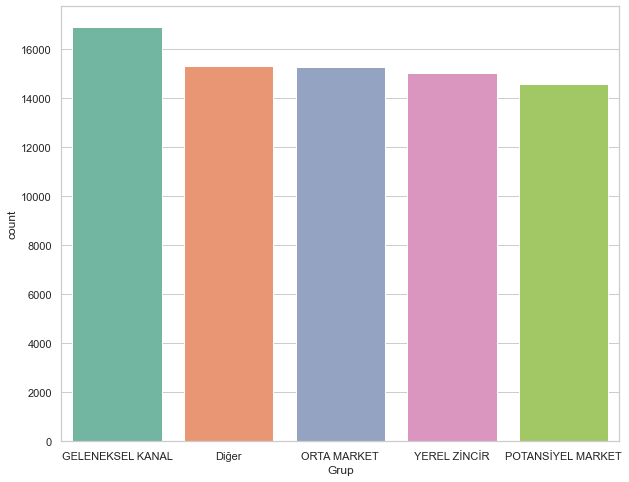

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Grup', palette='Set2', data = sales_horizon, order = sales_horizon['Grup'].value_counts().index)

In [9]:
freq_tab = pd.crosstab(index=sales_horizon['Grup'], columns='count')     
freq_tab['Ratio'] = (freq_tab['count']/freq_tab['count'].sum() )*100
freq_tab.sort_values(by='count',ascending=False).head(20)

col_0,count,Ratio
Grup,,
GELENEKSEL KANAL,16907,21.924399
Diğer,15331,19.880698
ORTA MARKET,15268,19.799001
YEREL ZİNCİR,15035,19.496855
POTANSİYEL MARKET,14574,18.899047


<AxesSubplot:xlabel='AnaKategori', ylabel='count'>

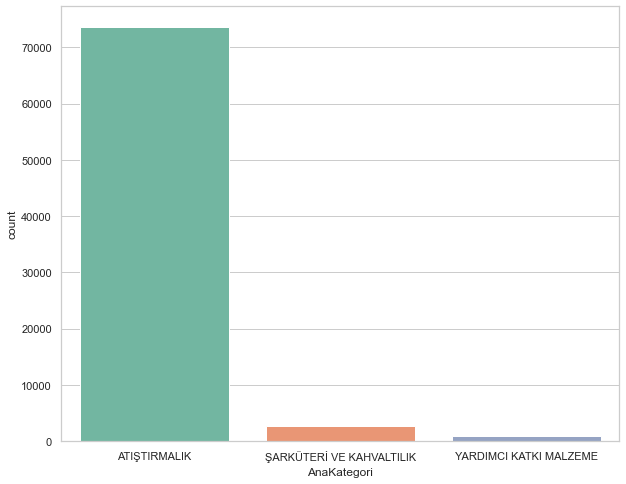

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'AnaKategori', palette='Set2', data = sales_horizon)

In [11]:
freq_tab = pd.crosstab(index=sales_horizon['AnaKategori'], columns='count')     
freq_tab['Ratio'] = (freq_tab['count']/freq_tab['count'].sum() )*100
freq_tab.sort_values(by='count',ascending=False)

col_0,count,Ratio
AnaKategori,,
ATIŞTIRMALIK,73566,95.397783
ŞARKÜTERİ VE KAHVALTILIK,2685,3.481813
YARDIMCI KATKI MALZEME,864,1.120405


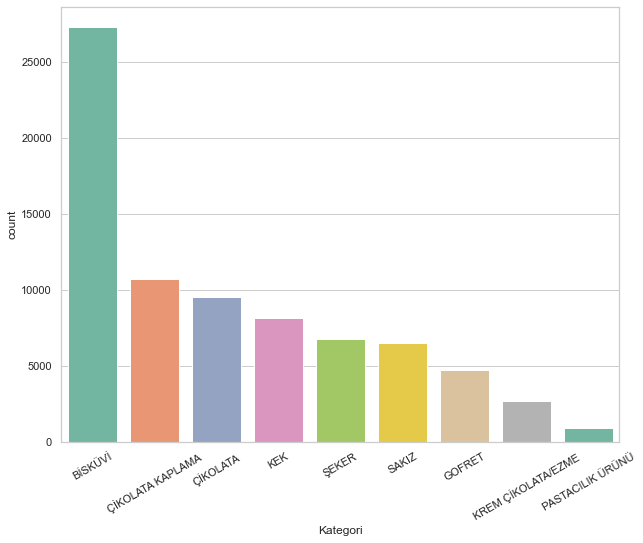

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Kategori', palette='Set2', data = sales_horizon, order = sales_horizon['Kategori'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [13]:
freq_tab = pd.crosstab(index=sales_horizon['Kategori'], columns='count')     
freq_tab['Ratio'] = (freq_tab['count']/freq_tab['count'].sum() )*100
freq_tab.sort_values(by='count',ascending=False).head(20)

col_0,count,Ratio
Kategori,,
BİSKÜVİ,27248,35.334241
ÇİKOLATA KAPLAMA,10724,13.906503
ÇİKOLATA,9516,12.340012
KEK,8141,10.556960
ŞEKER,6761,8.767425
SAKIZ,6492,8.418596
GOFRET,4684,6.074045
KREM ÇİKOLATA/EZME,2685,3.481813
PASTACILIK ÜRÜNÜ,864,1.120405


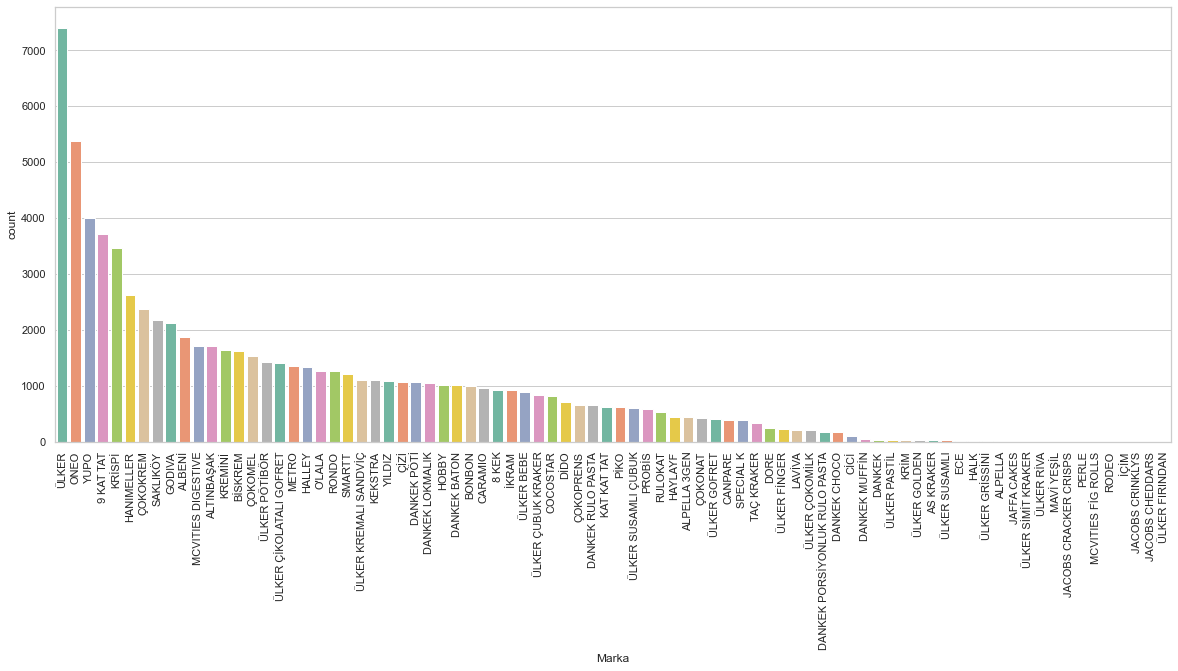

In [14]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Marka', palette='Set2', data = sales_horizon, order = sales_horizon['Marka'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [15]:
freq_tab = pd.crosstab(index=sales_horizon['Marka'], columns='count')     
freq_tab['Ratio'] = (freq_tab['count']/freq_tab['count'].sum() )*100
freq_tab.sort_values(by='count',ascending=False).head(20)

col_0,count,Ratio
Marka,,
ÜLKER,7404,9.601245
ONEO,5383,6.980484
YUPO,4007,5.196136
9 KAT TAT,3722,4.826558
KRİSPİ,3469,4.498476
HANIMELLER,2625,3.404007
ÇOKOKREM,2378,3.083706
SAKLIKÖY,2181,2.828244
GODIVA,2119,2.747844


In [16]:
def dist_plot(df,column):
    fig, axes = plt.subplots(1, 3, figsize=(25, 8))
    sns.despine(right = True)
    sns.distplot(df[column], ax=axes[0])
    sns.boxplot(df[column], ax = axes[1])
    sm.qqplot(df[column], line = 'r', ax = axes[2]);

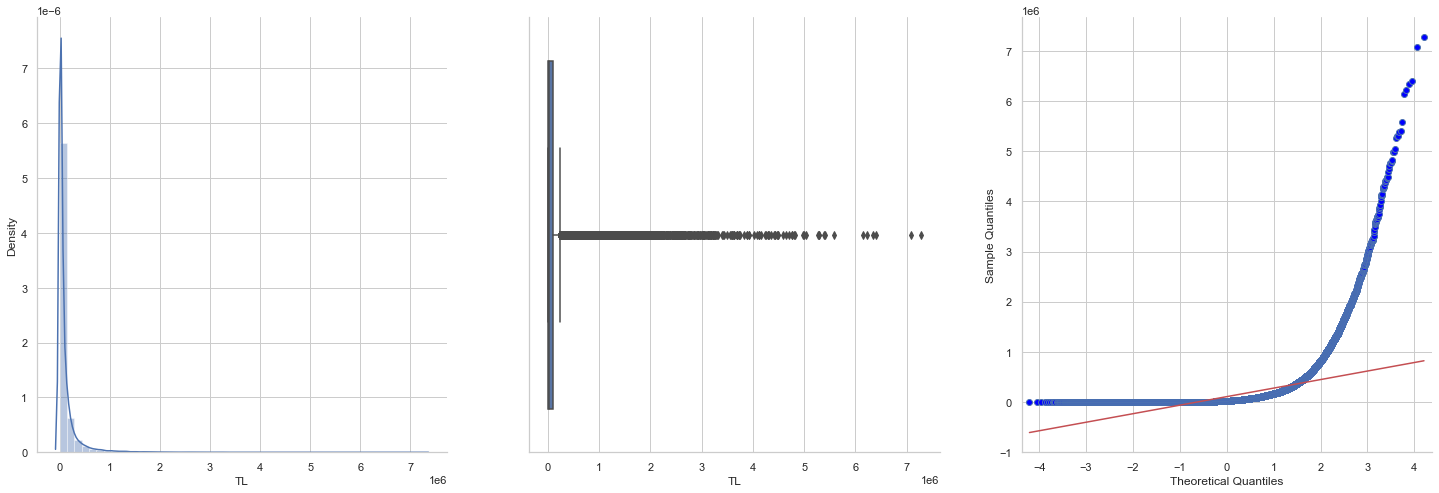

In [17]:
dist_plot(sales_horizon, 'TL')

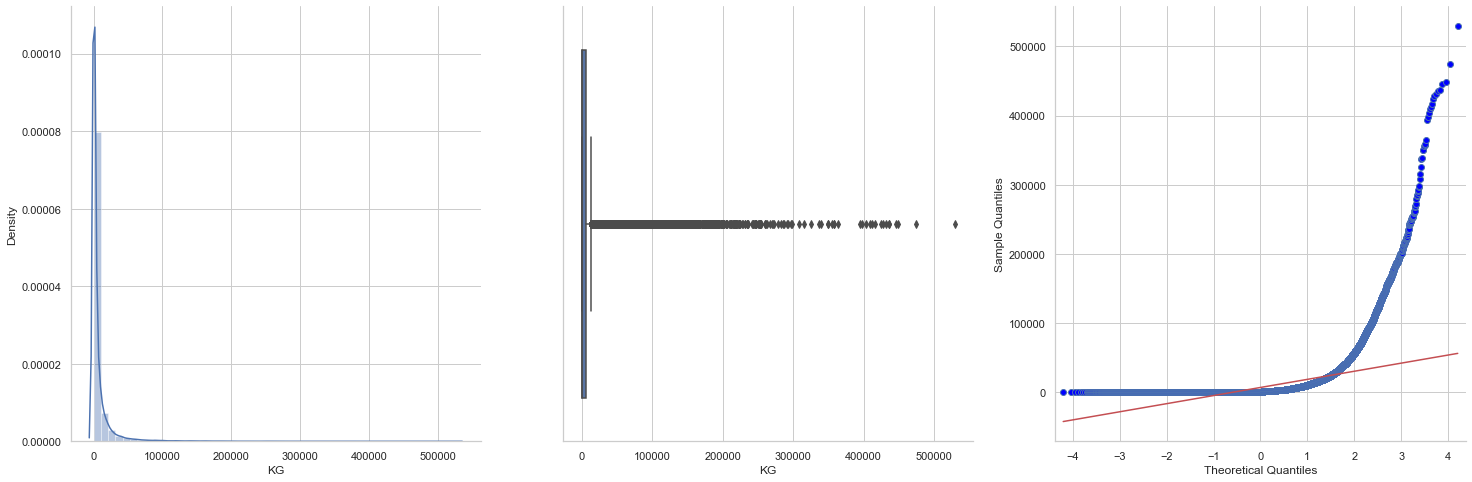

In [18]:
dist_plot(sales_horizon, 'KG')

In [19]:
sales_horizon.loc[:,['Adet','Koli','TL','KG']].describe()

,Adet,Koli,TL,KG
count,77115.000000,77115.000000,7.711500e+04,77115.000000
mean,63.173831,3685.608403,1.063821e+05,6953.450340
std,133.581868,9496.292151,2.748399e+05,19586.381077
min,1.000000,-1.000000,5.684342e-14,-4.176000
25%,12.000000,27.000000,2.154600e+03,65.520000
50%,24.000000,438.000000,2.100150e+04,907.848000
75%,72.000000,3163.000000,9.610880e+04,5499.360000
max,1500.000000,160842.000000,7.275274e+06,529180.800000


In [20]:
sales_horizon.Koli.describe()

count     77115.000000
mean       3685.608403
std        9496.292151
min          -1.000000
25%          27.000000
50%         438.000000
75%        3163.000000
max      160842.000000
Name: Koli, dtype: float64

In [21]:
sales_horizon[sales_horizon.Koli == 0]

,Yıl,Çeyrek,Ay,Grup,AnaKategori,Kategori,Marka,Kod,Urun,Adet,Koli,KG,TL
10305,2020,1,3,Diğer,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,136308,"ÜLKER Ç.GOF 41,5Gx36x6 %15B",216,0,-3.552714e-15,5.684342e-14
43081,2019,3,8,Diğer,ATIŞTIRMALIK,ÇİKOLATA,CARAMIO,149908,CARAMIO BİTTER BATON ÇİKOLATA 35GRx24x6,144,0,1.421085e-14,6.185000e+02
70196,2018,3,9,ORTA MARKET,ATIŞTIRMALIK,SAKIZ,YILDIZ,225308,"YILDIZ SOFT ÇİLEK AROMALI 1,4GRx100x15",1500,0,-8.881784e-16,2.160000e+02


## Koli ve KG bazında sorunlu 4 satır var

In [22]:
sales_horizon.loc[sales_horizon.KG.sort_values().head(4).index.to_list()]

,Yıl,Çeyrek,Ay,Grup,AnaKategori,Kategori,Marka,Kod,Urun,Adet,Koli,KG,TL
31572,2019,1,1,YEREL ZİNCİR,ATIŞTIRMALIK,ÇİKOLATA,SMARTT,23706,ÜLKER SMARTT KORNET 29GRx24x6,144,-1,-4.176000e+00,3.024000e+01
10305,2020,1,3,Diğer,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,136308,"ÜLKER Ç.GOF 41,5Gx36x6 %15B",216,0,-3.552714e-15,5.684342e-14
70196,2018,3,9,ORTA MARKET,ATIŞTIRMALIK,SAKIZ,YILDIZ,225308,"YILDIZ SOFT ÇİLEK AROMALI 1,4GRx100x15",1500,0,-8.881784e-16,2.160000e+02
43081,2019,3,8,Diğer,ATIŞTIRMALIK,ÇİKOLATA,CARAMIO,149908,CARAMIO BİTTER BATON ÇİKOLATA 35GRx24x6,144,0,1.421085e-14,6.185000e+02


In [23]:
sales_horizon.groupby(['Urun']).sum().sort_values('TL', ascending=False).head(10)

,Yıl,Çeyrek,Ay,Kod,Adet,Koli,KG,TL
Urun,,,,,,,,
ÇOKOKREM IML 400GRx8,262560,310,805,15769390,1040,3682530,1.178410e+07,2.490255e+08
HALLEY KAPLAMALI ÇİK.PASTA 8x30GRx12,302925,375,975,27991200,1800,3880629,1.117621e+07,2.108585e+08
BİSKREM KAKAOLU 100GRx18,393735,465,1200,22347780,3510,9083393,1.635011e+07,1.990837e+08
ÜLKER PÖTİBÖR BİSKÜVİ 4x200GRx6,302925,375,975,2580900,900,4684514,2.248567e+07,1.860448e+08
ÜLKER ÇİKOLATALI GOFRET 36GRX36X6,302870,361,925,20385150,32400,1009053,7.846396e+06,1.540299e+08
ALBENİ KAPL.SAND.72Gx24,393735,465,1200,7040085,4680,4111043,7.103882e+06,1.417387e+08
ÜLKER LAVİVA DOL.VE BİSK.ÇİK.35Gx24x6,393735,465,1200,12735255,28080,784483,3.953794e+06,1.221403e+08
ÇOKOKREM SAKL. KABI 950GRx4,262560,310,805,15795520,520,1672901,6.357024e+06,1.178318e+08
ÇİZİVİÇ PEYNİRLİ KRAKER90GR,355348,437,1135,1619728,4224,4094844,8.844863e+06,1.147231e+08


# Pasifik

In [24]:
sales_pasifik.head()

,Yıl,Çeyrek,Ay,Şirket Kodu,Grup adı,Grup Kodu.,Ana Kategori Adı,Kategori Adı,Marka Adı,Ürün Kodu,Ürün Adı,Koli İçi Adet,Koli,KG,TL
0,2021,1,1,1129,A101,Z45,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11605,ALTINBAŞAK YULAFLI 5x46Gx12 TEK ÖNYÜZ,12,6848.0,18900.48,350069.76
1,2021,1,1,1129,A101,Z45,ATIŞTIRMALIK,BİSKÜVİ,ALTINBAŞAK,11806,ALTINBAŞAK ÇÖR.KİN.KR.5x40Gx12 TEK ÖNYÜZ,12,2853.0,6847.20,177342.48
2,2021,1,1,1129,A101,Z45,ATIŞTIRMALIK,BİSKÜVİ,BİSKREM,114604,BİSKREM KAK.KRE.100Gx18,18,16160.0,29088.00,480571.20
3,2021,1,1,1129,A101,Z45,ATIŞTIRMALIK,BİSKÜVİ,BİSKREM,115301,BİSKREM KAK.B.BOY POŞET 200Gx12,12,14966.0,35918.40,540912.96
4,2021,1,1,1129,A101,Z45,ATIŞTIRMALIK,BİSKÜVİ,BİSKREM,115806,BISKREM DUBLE RUBY VE SÜTLÜ ÇİK.100Gx18,18,10623.0,19121.40,353745.90


In [25]:
sales_pasifik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35533 entries, 0 to 35532
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yıl               35533 non-null  int64  
 1   Çeyrek            35533 non-null  int64  
 2   Ay                35533 non-null  int64  
 3   Şirket Kodu       35533 non-null  int64  
 4   Grup adı          35533 non-null  object 
 5   Grup Kodu.        35533 non-null  object 
 6   Ana Kategori Adı  35533 non-null  object 
 7   Kategori Adı      35533 non-null  object 
 8   Marka Adı         35533 non-null  object 
 9   Ürün Kodu         35533 non-null  int64  
 10  Ürün Adı          35533 non-null  object 
 11  Koli İçi Adet     35533 non-null  int64  
 12  Koli              35533 non-null  float64
 13  KG                35533 non-null  float64
 14  TL                35533 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 4.1+ MB


In [26]:
sales_pasifik.rename(columns = {'Şirket Kodu'       : 'SirketKod',
                                'Grup adı'          : 'Grup',
                                'Grup Kodu.'        : 'GrupKod',
                                'Ana Kategori Adı'  : 'AnaKategori',
                                'Kategori Adı'      : 'Kategori',
                                'Marka Adı'         : 'Marka',
                                'Ürün Kodu'         : 'UrunKod',
                                'Ürün Adı'          : 'Urun',
                                'Koli İçi Adet'     : 'Adet'}, inplace=True)

In [27]:
sales_pasifik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35533 entries, 0 to 35532
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yıl          35533 non-null  int64  
 1   Çeyrek       35533 non-null  int64  
 2   Ay           35533 non-null  int64  
 3   SirketKod    35533 non-null  int64  
 4   Grup         35533 non-null  object 
 5   GrupKod      35533 non-null  object 
 6   AnaKategori  35533 non-null  object 
 7   Kategori     35533 non-null  object 
 8   Marka        35533 non-null  object 
 9   UrunKod      35533 non-null  int64  
 10  Urun         35533 non-null  object 
 11  Adet         35533 non-null  int64  
 12  Koli         35533 non-null  float64
 13  KG           35533 non-null  float64
 14  TL           35533 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 4.1+ MB


In [28]:
sales_pasifik.nunique()

Yıl                4
Çeyrek             4
Ay                12
SirketKod          1
Grup               5
GrupKod            5
AnaKategori        3
Kategori           9
Marka             75
UrunKod          911
Urun             911
Adet              47
Koli           17304
KG             28328
TL             29778
dtype: int64

In [29]:
sales_pasifik.loc[:,['Adet','Koli','KG','TL']].describe()

,Adet,Koli,KG,TL
count,35533.000000,35533.000000,35533.000000,3.553300e+04
mean,50.119692,4733.096057,11407.237171,2.093718e+05
std,81.742810,10128.228671,26800.698421,4.527616e+05
min,1.000000,-22.000000,-71.280000,1.000000e-02
25%,12.000000,293.639740,548.640000,1.611456e+04
50%,24.000000,1418.445670,2634.170000,5.778000e+04
75%,48.000000,4492.000000,9920.232000,1.978109e+05
max,1500.000000,191305.000000,555321.600000,1.034379e+07


## 732 satır koli < 1

In [30]:
sales_pasifik.sort_values('Koli').head(732)

,Yıl,Çeyrek,Ay,SirketKod,Grup,GrupKod,AnaKategori,Kategori,Marka,UrunKod,Urun,Adet,Koli,KG,TL
34440,2018,4,11,1129,MİGROS,Z04,ATIŞTIRMALIK,BİSKÜVİ,ÇOKOMEL,131106,ÇOKOMEL MARS.ÇİLEK 45x12Gx6,270,-22.00000,-7.128000e+01,3456.00
34439,2018,4,11,1129,MİGROS,Z04,ATIŞTIRMALIK,BİSKÜVİ,ÇOKOMEL,131105,ÇOKOMEL MARS.SADE 45x12Gxx6,270,-5.00000,-1.620000e+01,4465.80
33696,2018,4,10,1129,MİGROS,Z04,ATIŞTIRMALIK,BİSKÜVİ,ÇOKOMEL,130408,ÇOKOMEL LOKMALIK MARSH.KARAM.91Gx10,10,0.00000,-3.552714e-15,216.00
14636,2020,4,12,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA,SMARTT,23008,SMARTT MİNİ ÇİK.9Gx48x6,288,0.00347,9.000000e-03,0.19
4915,2020,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ŞEKER,KREMİNİ,53709,KREMİNİ VİŞN.TOFFE STICK 10LU 44Gx20x12,240,0.00417,4.400000e-02,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2021,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,BİSKÜVİ,HANIMELLER,119200,HANIMELLER KURAB.M 180Gx12,12,0.99996,2.160000e+00,52.80
13225,2020,4,11,1129,Diğer,Diğer,ATIŞTIRMALIK,BİSKÜVİ,SAKLIKÖY,86302,SAKLIKÖY YULAFLI BİSK.MP 4x77Gx12,12,0.99996,3.696000e+00,39.96
12378,2020,4,10,1129,Diğer,Diğer,ATIŞTIRMALIK,GOFRET,9 KAT TAT,86401,9 KAT TAT RULOKAT ÇİLEK 42Gx12,12,0.99996,5.040000e-01,13.32
32007,2018,3,8,1129,Diğer,Diğer,ATIŞTIRMALIK,SAKIZ,ONEO,226108,ONEO DRAJE FİŞEK NANE AR.SAK.14Gx20,180,0.99999,2.520000e+00,104.60


In [31]:
sales_pasifik[sales_pasifik.Koli < 1].shape

(732, 15)

<AxesSubplot:xlabel='Grup', ylabel='count'>

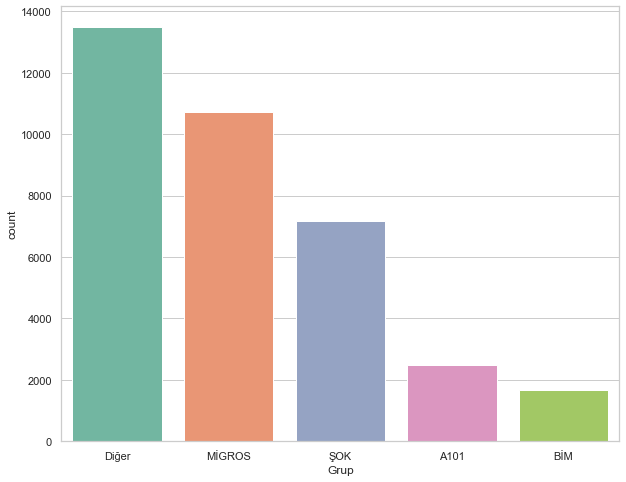

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Grup', palette='Set2', data = sales_pasifik, order = sales_pasifik['Grup'].value_counts().index)

In [33]:
freq_tab = pd.crosstab(index=sales_pasifik['Grup'], columns='count')     
freq_tab['Percentage'] = ((freq_tab['count']/freq_tab['count'].sum() )*100)
freq_tab.sort_values(by='count',ascending=False)

col_0,count,Percentage
Grup,,
Diğer,13486,37.953452
MİGROS,10734,30.208539
ŞOK,7160,20.150283
A101,2483,6.987870
BİM,1670,4.699856


<AxesSubplot:xlabel='AnaKategori', ylabel='count'>

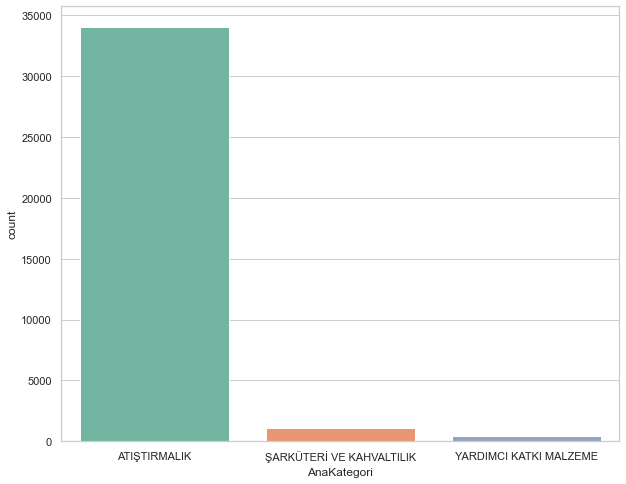

In [34]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'AnaKategori', palette='Set2', data = sales_pasifik, order = sales_pasifik['AnaKategori'].value_counts().index)

In [35]:
freq_tab = pd.crosstab(index=sales_pasifik['AnaKategori'], columns='count')     
freq_tab['Percentage'] = ((freq_tab['count']/freq_tab['count'].sum() )*100)
freq_tab.sort_values(by='count',ascending=False)

col_0,count,Percentage
AnaKategori,,
ATIŞTIRMALIK,34031,95.772943
ŞARKÜTERİ VE KAHVALTILIK,1078,3.033800
YARDIMCI KATKI MALZEME,424,1.193257


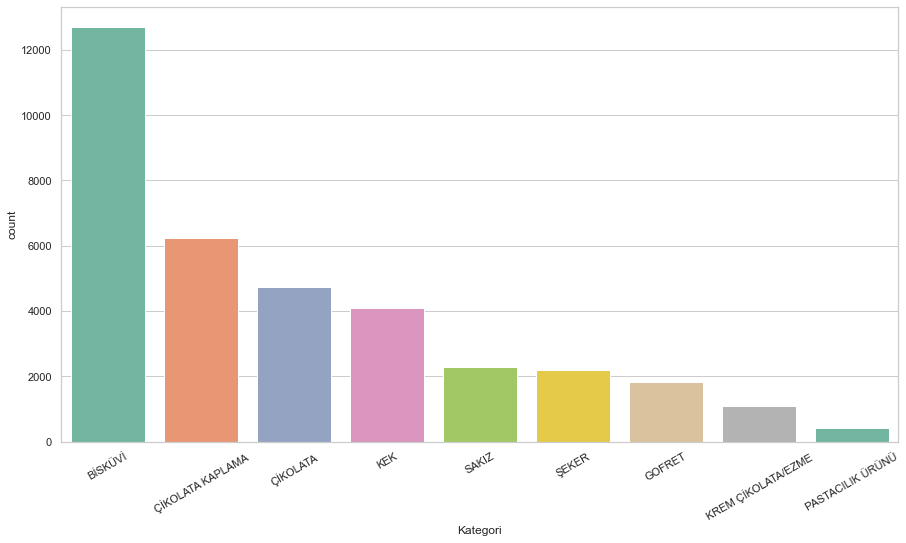

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Kategori', palette='Set2', data = sales_pasifik, order = sales_pasifik['Kategori'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [37]:
freq_tab = pd.crosstab(index=sales_pasifik['Kategori'], columns='count')     
freq_tab['Percentage'] = ((freq_tab['count']/freq_tab['count'].sum() )*100)
freq_tab.sort_values(by='count',ascending=False)

col_0,count,Percentage
Kategori,,
BİSKÜVİ,12684,35.696395
ÇİKOLATA KAPLAMA,6228,17.527369
ÇİKOLATA,4741,13.342527
KEK,4083,11.490727
SAKIZ,2277,6.408128
ŞEKER,2206,6.208313
GOFRET,1812,5.099485
KREM ÇİKOLATA/EZME,1078,3.033800
PASTACILIK ÜRÜNÜ,424,1.193257


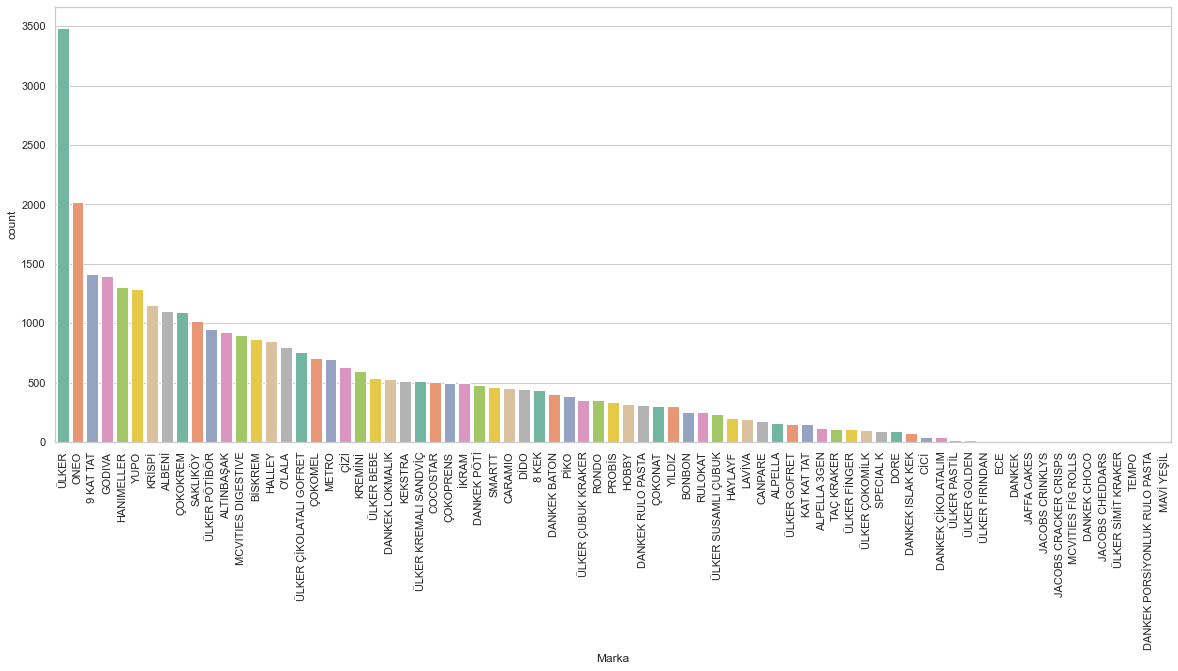

In [38]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Marka', palette='Set2', data = sales_pasifik, order = sales_pasifik['Marka'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [39]:
freq_tab = pd.crosstab(index=sales_pasifik['Marka'], columns='count')     
freq_tab['Percentage'] = ((freq_tab['count']/freq_tab['count'].sum() )*100)
freq_tab.sort_values(by='count',ascending=False).head(20)

col_0,count,Percentage
Marka,,
ÜLKER,3488,9.816227
ONEO,2020,5.684856
9 KAT TAT,1410,3.968142
GODIVA,1397,3.931557
HANIMELLER,1303,3.667014
YUPO,1290,3.630428
KRİSPİ,1152,3.242057
ALBENİ,1106,3.112600
ÇOKOKREM,1097,3.087271


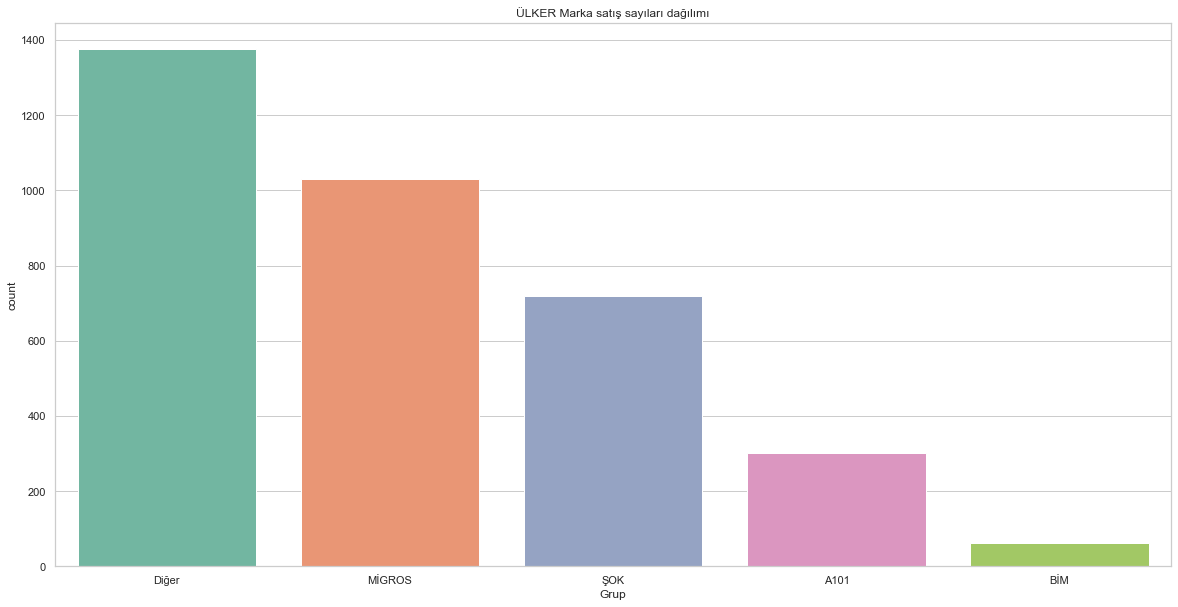

In [40]:
tmp = sales_pasifik[sales_pasifik['Marka']=='ÜLKER']
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style='whitegrid')
sns.countplot(x = 'Grup', palette='Set2', data = tmp, order = tmp['Grup'].value_counts().index)
plt.title('ÜLKER Marka satış sayıları dağılımı')
plt.show()

In [41]:
sales_horizon.groupby(['AnaKategori']).sum().sort_values('TL', ascending=False)

,Yıl,Çeyrek,Ay,Kod,Adet,Koli,KG,TL
AnaKategori,,,,,,,,
ATIŞTIRMALIK,148540436,175178,451646,7976855593,4751816,270374040,4.891720e+08,7.352753e+09
ŞARKÜTERİ VE KAHVALTILIK,5421350,6274,16130,248343092,56306,13308927,4.582255e+07,8.098670e+08
YARDIMCI KATKI MALZEME,1744753,2044,5283,107563540,63528,532725,1.220769e+06,4.103177e+07


In [42]:
sales_pasifik.groupby(['Kategori']).sum().sort_values('TL', ascending=False)

,Yıl,Çeyrek,Ay,SirketKod,UrunKod,Adet,Koli,KG,TL
Kategori,,,,,,,,,
ÇİKOLATA KAPLAMA,12576254,14779,38115,7031412,549939724,492398,3.205790e+07,1.145838e+08,2.636027e+09
BİSKÜVİ,25611815,29670,76323,14320236,964029493,225309,8.351917e+07,1.946996e+08,2.396292e+09
ÇİKOLATA,9573392,11198,28880,5352589,714665394,315909,7.507296e+06,1.915750e+07,8.732749e+08
KEK,8244143,9577,24658,4609707,293331689,75889,2.884483e+07,3.604408e+07,6.150303e+08
KREM ÇİKOLATA/EZME,2176702,2565,6600,1217062,93743972,35874,7.052744e+06,2.608376e+07,5.024854e+08
GOFRET,3658681,4229,10867,2045748,142699405,27832,5.613944e+06,7.519514e+06,1.596465e+08
SAKIZ,4597742,5444,14079,2570733,507755499,300343,1.086354e+06,1.653703e+06,9.925356e+07
ŞEKER,4454368,5180,13335,2490574,327753283,283295,1.763465e+06,3.840193e+06,9.697010e+07
PASTACILIK ÜRÜNÜ,856275,984,2525,478696,54443595,24054,7.354021e+05,1.751120e+06,6.062974e+07


In [43]:
tmp = sales_pasifik[sales_pasifik.Kategori == 'ÇİKOLATA KAPLAMA']

In [44]:
tmp.groupby(['Urun']).sum().sort_values('TL', ascending=False)

,Yıl,Çeyrek,Ay,SirketKod,UrunKod,Adet,Koli,KG,TL
Urun,,,,,,,,,
ULK ÇİK.GOF.36Gx36x6,214054,237,607,119674,14405506,22896,1.340333e+06,1.042220e+07,2.181661e+08
ÇOKONAT KAPL.GOF.33Gx24x6,391717,464,1197,219026,14279564,27936,1.136965e+06,5.402858e+06,1.760317e+08
DİDO SÜT.ÇİK.GOF.35Gx24x6,314988,372,960,176124,20374848,22464,9.583843e+05,4.830260e+06,1.471875e+08
HALLEY KAPL.ÇİK.PASTA 8x30Gx12,240322,296,770,134351,22206352,1428,2.575712e+06,7.418051e+06,1.389827e+08
ALBENİ KAPL.BAR 40Gx24x6 YENİ DZ.,234221,279,719,130964,4002580,16704,8.451278e+05,4.867937e+06,1.066822e+08
...,...,...,...,...,...,...,...,...,...
ULK ÇİK.GOF.10x40Gx24,2021,1,2,1129,20507,24,4.167000e-02,4.000000e-01,5.040000e+00
DİDO SÜT.ÇİK.KAPL.DRAJE 96Gx16,2021,1,2,1129,29505,16,1.250000e-01,1.920000e-01,2.960000e+00
ALBENİ KAPL.BAR 144Gx12,2021,1,2,1129,36109,12,8.333000e-02,1.440000e-01,1.850000e+00


## Ülker Çikolatalı Gofret 36Gx36x6 <br>Kod: 135901 x En Güncel kod: 0020500<br> 2 farklı kodla 2021 1-2-3. aylarda ve 2020 6-7-8. aylarda satılmış <br> 20505 koduyla da 2020 7-8. aylarda satılmış. 2019'da 5-10. aylarda da hem 135901 hem 20505 koduyla satılmış

In [45]:
tmp[(tmp.Urun == 'ULK ÇİK.GOF.36Gx36x6') & (tmp.Grup == 'MİGROS')]

,Yıl,Çeyrek,Ay,SirketKod,Grup,GrupKod,AnaKategori,Kategori,Marka,UrunKod,Urun,Adet,Koli,KG,TL
688,2021,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,2706.00000,21041.856,543581.28
1736,2021,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,4116.82414,32012.424,826987.62
2832,2021,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,2702.21769,21012.444,542821.47
3787,2020,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,3941.00000,30645.216,629929.44
4828,2020,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,8041.05109,62527.212,1285281.58
5872,2020,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,5713.08390,44424.936,913179.24
6882,2020,2,4,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,4393.00000,34159.968,702177.12
7832,2020,2,5,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,1993.06490,15498.072,318571.48
8744,2020,2,6,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,500.00000,3888.000,79920.00
9697,2020,3,7,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135901,ULK ÇİK.GOF.36Gx36x6,216,1.21769,9.468,194.62


In [46]:
tmp[(tmp.Urun == 'ULK.ÇİK.GOF. 39Gx36x6') & (tmp.Grup == 'MİGROS')]

,Yıl,Çeyrek,Ay,SirketKod,Grup,GrupKod,AnaKategori,Kategori,Marka,UrunKod,Urun,Adet,Koli,KG,TL
685,2021,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,302.00000,2544.048,60665.76
1732,2021,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,2.22240,18.720,446.40
2829,2021,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,0.02315,0.195,4.65
8743,2020,2,6,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,1799.00000,15154.776,361383.12
9694,2020,3,7,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,2413.00000,20327.112,484723.44
10726,2020,3,8,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,1386.00926,11675.742,278421.54
11695,2020,3,9,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,2955.00000,24892.920,593600.40
12686,2020,4,10,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,2350.00000,19796.400,472068.00
13701,2020,4,11,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,1571.00000,13234.104,315582.48
14727,2020,4,12,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20500,ULK.ÇİK.GOF. 39Gx36x6,216,1300.81496,10958.064,261307.68


In [47]:
tmp[(tmp.Urun == 'ULK ÇİK.GOF.40Gx36x6') & (tmp.Grup == 'MİGROS')]

,Yıl,Çeyrek,Ay,SirketKod,Grup,GrupKod,AnaKategori,Kategori,Marka,UrunKod,Urun,Adet,Koli,KG,TL
9695,2020,3,7,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,0.17131,1.48,27.38
10727,2020,3,8,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,0.07871,0.68,12.58
15599,2019,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,4172.00000,36046.08,666852.48
16509,2019,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,5856.00000,50595.84,936023.04
17386,2019,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,4824.00000,41679.36,771068.16
18257,2019,2,4,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,3621.00000,31285.44,578780.64
19139,2019,2,5,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,4815.00000,41601.60,769629.60
23518,2019,4,10,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,0.00463,0.04,0.74
32229,2018,3,8,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,2093.00000,18083.52,334545.12
33041,2018,3,9,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,20505,ULK ÇİK.GOF.40Gx36x6,216,1904.00000,16450.56,304335.36


In [48]:
tmp[(tmp.Urun == 'ÇOKONAT KAPL.GOF.33Gx24x6') & (tmp.Grup == 'MİGROS')].shape

(39, 15)

In [49]:
tmp.groupby(['Urun']).sum().sort_values('TL', ascending=False).index

Index(['ULK ÇİK.GOF.36Gx36x6', 'ÇOKONAT KAPL.GOF.33Gx24x6',
       'DİDO SÜT.ÇİK.GOF.35Gx24x6', 'HALLEY KAPL.ÇİK.PASTA 8x30Gx12',
       'ALBENİ KAPL.BAR 40Gx24x6 YENİ DZ.', 'ULK.ÇİK.GOF. 39Gx36x6',
       'LAVİVA DOLG.VE BİSK.ÇİK.35Gx24x6', 'ALBENİ KAPL.BAR 40Gx24x6',
       'COCOSTAR H.CEV.BAR 28Gx24x6 YENİ', 'HOBBY MİNİ İKR.POŞET 250Gx12',
       ...
       'ALBENİ TANE TANE KUTU 29Gx24x4', 'GDV CHOCOLATE DOMES FIN.500Gx6',
       'HALLEY 10 LU DEV KOLİ 300Gx294', 'HOBBY BAR 22Gx24x6',
       'LAVİVA STD.KL.35Gx24x16', 'ULK ÇİK.GOF.10x40Gx24',
       'DİDO SÜT.ÇİK.KAPL.DRAJE 96Gx16', 'ALBENİ KAPL.BAR 144Gx12',
       'DİDO BLACK BİT.ÇİK.GOF.40,5Gx24x6', 'ALPELLA 3GEN GOF.FIN.36Gx24x6'],
      dtype='object', name='Urun', length=136)

In [50]:
"""for grup in tmp.Grup.unique():
    print(f'\n{grup}')
    print('='*60)
    for urun in tmp.groupby(['Urun']).sum().sort_values('TL', ascending=False).index.to_list():
        number = tmp[(tmp.Urun == urun) & (tmp.Grup == grup)].shape[0]
        if (number > 0): 
            print(f'Name of product: {urun}')
            print(f'Number of entry: {number}')
            print('-'*60)
        else:
            pass
    print('='*60)"""

"for grup in tmp.Grup.unique():\n    print(f'\n{grup}')\n    print('='*60)\n    for urun in tmp.groupby(['Urun']).sum().sort_values('TL', ascending=False).index.to_list():\n        number = tmp[(tmp.Urun == urun) & (tmp.Grup == grup)].shape[0]\n        if (number > 0): \n            print(f'Name of product: {urun}')\n            print(f'Number of entry: {number}')\n            print('-'*60)\n        else:\n            pass\n    print('='*60)"

# MİGROS / ULK ÇİK.GOF.5x36Gx24

In [51]:
tmp_migros = tmp[tmp.Grup == 'MİGROS']
migros_cik_gof = tmp_migros[tmp_migros.Marka == 'ÜLKER ÇİKOLATALI GOFRET']

In [52]:
migros_cik_gof.UrunKod.unique()

array([ 20500,  20600,  20603, 135901, 135903, 136001, 136304, 136408,
       136502,  20507, 136209,  85702, 136101,  20505, 136500, 135900,
       135906, 136206], dtype=int64)

In [53]:
migros_cik_gof.Urun.unique()

array(['ULK.ÇİK.GOF. 39Gx36x6', 'ULK ÇİK.GOF.EXTRA SÜTLÜ-FIN.45GX18X6',
       'ULK ÇİK.GOF.EXTRA BİT.45GX18X6', 'ULK ÇİK.GOF.36Gx36x6',
       'ULK ÇİK.GOF.5x36Gx24', 'ULK ÇİK.GOF.BİT.36Gx24x6',
       'ULK ÇİK.GOF.MİNİ ÇOKLU PAK.82Gx10', 'ULK ÇİK.GOF.BİTTER 39Gx24x6',
       'ULK.ÇİK.GOF. BEYAZ 35Gx36x6', 'ULK ÇİK.GOF.10x40Gx24',
       'ULK ÇIK.GOF.MİNİ 15Gx40x6', 'ULK ÇİK.GOF.BİT.40Gx24x6',
       'ULK ÇİK.GOFR.SADE DİLİM 61Gx15', 'ULK ÇİK.GOF.40Gx36x6',
       'ULK ÇİK.GOF.39Gx36x6 STAND KOLİ', 'ULK ÇİK.GOF.STD.KL.40Gx216',
       'ULK ÇİK.GOF.BÜY.BOY 48Gx24x6', 'ULK ÇİK.GOF.5x32Gx24'],
      dtype=object)

In [54]:
df = migros_cik_gof[migros_cik_gof.UrunKod == 135903]

In [55]:
df.loc[:,['Yıl','Ay','Adet','KG','TL']]

,Yıl,Ay,Adet,KG,TL
689,2021,1,24,47692.80,1173758.40
1737,2021,2,24,29685.60,732244.80
2833,2021,3,24,41990.40,1035763.20
3788,2020,1,24,13512.96,269508.48
4829,2020,2,24,64783.98,1292080.49
5873,2020,3,24,33491.16,667962.58
6883,2020,4,24,43005.60,857722.80
7833,2020,5,24,17724.06,353496.53
8745,2020,6,24,16070.40,352310.40
9698,2020,7,24,82431.72,1863872.78


In [56]:
new_df = pd.merge(df, aktivite, how='left', left_on=['Yıl','Çeyrek','Ay'], right_on = ['Yıl','Çeyrek','Ay'])

In [57]:
new_df.head(5)

,Yıl,Çeyrek,Ay,SirketKod,Grup,GrupKod,AnaKategori,Kategori,Marka,UrunKod,Urun,Adet,Koli,KG,TL,İndirimli Raf Satış Fiyatı,İndirim
0,2021,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,11040.00000,47692.80,1173758.40,NaN,NaN
1,2021,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,6871.66744,29685.60,732244.80,NaN,NaN
2,2021,1,3,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,9720.00016,41990.40,1035763.20,NaN,NaN
3,2020,1,1,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,3128.00000,13512.96,269508.48,NaN,NaN
4,2020,1,2,1129,MİGROS,Z04,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,14996.29201,64783.98,1292080.49,NaN,NaN


In [58]:
new_df.isna().sum()

Yıl                            0
Çeyrek                         0
Ay                             0
SirketKod                      0
Grup                           0
GrupKod                        0
AnaKategori                    0
Kategori                       0
Marka                          0
UrunKod                        0
Urun                           0
Adet                           0
Koli                           0
KG                             0
TL                             0
İndirimli Raf Satış Fiyatı    23
İndirim                       23
dtype: int64

In [59]:
new_df.rename(columns = {'İndirim ': 'indirim'},inplace=True)

In [60]:
indirimsiz = new_df[new_df.indirim.isna()]
indirimli  = new_df[new_df.indirim.notna()]

In [61]:
indirimsiz.shape

(23, 17)

In [62]:
indirimli.shape

(12, 17)

### H0: Mean TL of indirimli is equal to mean TL of indirimsiz

In [63]:
f_oneway(indirimli.TL, indirimsiz.TL)

F_onewayResult(statistic=0.7337614953838587, pvalue=0.397844471182457)

Fail to reject H0, ULK ÇİK.GOF.5x36Gx24 için indirim olup olmaması satışları TL bazında etkilemiyor.

### H0: Mean KG of indirimli is equal to mean KG of indirimsiz

In [64]:
f_oneway(indirimli.KG, indirimsiz.KG)

F_onewayResult(statistic=1.2554900687082917, pvalue=0.2705949882670423)

Fail to reject H0, ULK ÇİK.GOF.5x36Gx24 için indirim olup olmaması satışları KG bazında da etkilemiyor.

In [66]:
aktivite_pasifik.columns

Index(['Yıl', 'Çeyrek', 'Ay', 'Müşteri Grup', 'Ana Kategori Adı',
       'Kategori Adı', 'Marka Adı', 'Ürün Kodu', 'Ürün Adı',
       'Raf Tavsiye Satış Fiyatı', 'İndirimli Raf Satış Fiyatı', 'İndirim %'],
      dtype='object')

In [67]:
aktivite_pasifik.rename(columns = { 'Müşteri Grup'      : 'Grup',
                                    'Ana Kategori Adı'  : 'AnaKategori',
                                    'Kategori Adı'      : 'Kategori',
                                    'Marka Adı'         : 'Marka',
                                    'Ürün Kodu'         : 'UrunKod',
                                    'Ürün Adı'          : 'Urun',
                                    'Raf Tavsiye Satış Fiyatı' : 'TavsiyeSatışFiyatı',
                                    'İndirimli Raf Satış Fiyatı' : 'İndirimliSatışFiyatı',
                                    'İndirim %' : 'İndirim'}, inplace=True)

In [68]:
pasifik = pd.merge(sales_pasifik, aktivite_pasifik, how='left', 
                  left_on =  ['Yıl','Çeyrek','Ay','Grup','AnaKategori','Kategori','Marka','UrunKod','Urun'],
                  right_on = ['Yıl','Çeyrek','Ay','Grup','AnaKategori','Kategori','Marka','UrunKod','Urun'])

# ANOVA Tests

In [69]:
for grup in pasifik.Grup.unique()[pasifik.Grup.unique() != 'Diğer']:
    tmp = pasifik[pasifik.Grup == grup]
    tmp['ToplamAdet'] = tmp['Adet'] * tmp['Koli']
    indirimsiz = tmp[tmp.İndirim.isna()]
    indirimli  = tmp[tmp.İndirim.notna()]
    print(f'\nMüşteri Grubu : {grup}')
    print('-'*40)
    print(f'p value of One-Way ANOVA for TL:   {"%.3f" % f_oneway(indirimsiz.TL, indirimli.TL)[1]}')
    print(f'p value of One-Way ANOVA for KG:   {"%.3f" % f_oneway(indirimsiz.KG, indirimli.KG)[1]}')
    print(f'p value of One-Way ANOVA for Adet: {"%.3f" % f_oneway(indirimsiz.ToplamAdet, indirimli.ToplamAdet)[1]}')
    print(f'\nİndirimli  TL mean: {"%3.f" % indirimli.TL.mean()}')
    print(f'İndirimsiz TL mean: {"%3.f" % indirimsiz.TL.mean()}')
    print(f'\nİndirimli  KG mean: {"%3.f" % indirimli.KG.mean()}')
    print(f'İndirimsiz KG mean: {"%3.f" % indirimsiz.KG.mean()}')
    print(f'\nİndirimli  Toplam Adet mean: {"%3.f" % indirimli.ToplamAdet.mean()}')
    print(f'İndirimsiz Toplam Adet mean: {"%3.f" % indirimsiz.ToplamAdet.mean()}')
    print(f'\nİndirimli  satış girdisi: {indirimli.shape[0]}')
    print(f'İndirimsiz satış girdisi: {indirimsiz.shape[0]}')
    print('-'*40)


Müşteri Grubu : A101
----------------------------------------
p value of One-Way ANOVA for TL:   0.192
p value of One-Way ANOVA for KG:   0.430
p value of One-Way ANOVA for Adet: 0.000

İndirimli  TL mean: 557499
İndirimsiz TL mean: 603653

İndirimli  KG mean: 33307
İndirimsiz KG mean: 35246

İndirimli  Toplam Adet mean: 233605
İndirimsiz Toplam Adet mean: 455351

İndirimli  satış girdisi: 277
İndirimsiz satış girdisi: 2218
----------------------------------------

Müşteri Grubu : BİM
----------------------------------------
p value of One-Way ANOVA for TL:   0.026
p value of One-Way ANOVA for KG:   0.011
p value of One-Way ANOVA for Adet: 0.001

İndirimli  TL mean: 620456
İndirimsiz TL mean: 964673

İndirimli  KG mean: 31573
İndirimsiz KG mean: 56251

İndirimli  Toplam Adet mean: 167304
İndirimsiz Toplam Adet mean: 690710

İndirimli  satış girdisi: 58
İndirimsiz satış girdisi: 1616
----------------------------------------

Müşteri Grubu : MİGROS
--------------------------------------

In [70]:
for kategori in pasifik.Kategori.unique():
    tmp = pasifik[pasifik.Kategori == kategori]
    tmp['ToplamAdet'] = tmp['Adet'] * tmp['Koli']
    indirimsiz = tmp[tmp.İndirim.isna()]
    indirimli  = tmp[tmp.İndirim.notna()]
    print(f'\nKategori : {kategori}')
    print('-'*40)
    print(f'p value of One-Way ANOVA for TL:   {"%.3f" % f_oneway(indirimsiz.TL, indirimli.TL)[1]}')
    print(f'p value of One-Way ANOVA for KG:   {"%.3f" % f_oneway(indirimsiz.KG, indirimli.KG)[1]}')
    print(f'p value of One-Way ANOVA for Adet: {"%.3f" % f_oneway(indirimsiz.ToplamAdet, indirimli.ToplamAdet)[1]}')
    print(f'\nİndirimli  TL mean: {"%3.f" % indirimli.TL.mean()}')
    print(f'İndirimsiz TL mean: {"%3.f" % indirimsiz.TL.mean()}')
    print(f'\nİndirimli  KG mean: {"%3.f" % indirimli.KG.mean()}')
    print(f'İndirimsiz KG mean: {"%3.f" % indirimsiz.KG.mean()}')
    print(f'\nİndirimli  Toplam Adet mean: {"%3.f" % indirimli.ToplamAdet.mean()}')
    print(f'İndirimsiz Toplam Adet mean: {"%3.f" % indirimsiz.ToplamAdet.mean()}')
    print(f'\nİndirimli  satış girdisi: {indirimli.shape[0]}')
    print(f'İndirimsiz satış girdisi: {indirimsiz.shape[0]}')
    print('-'*40)


Kategori : BİSKÜVİ
----------------------------------------
p value of One-Way ANOVA for TL:   0.000
p value of One-Way ANOVA for KG:   0.000
p value of One-Way ANOVA for Adet: 0.210

İndirimli  TL mean: 293977
İndirimsiz TL mean: 185319

İndirimli  KG mean: 22918
İndirimsiz KG mean: 15083

İndirimli  Toplam Adet mean: 134775
İndirimsiz Toplam Adet mean: 117311

İndirimli  satış girdisi: 489
İndirimsiz satış girdisi: 12209
----------------------------------------

Kategori : ÇİKOLATA
----------------------------------------
p value of One-Way ANOVA for TL:   0.000
p value of One-Way ANOVA for KG:   0.000
p value of One-Way ANOVA for Adet: 0.239

İndirimli  TL mean: 291546
İndirimsiz TL mean: 177157

İndirimli  KG mean: 5688
İndirimsiz KG mean: 3933

İndirimli  Toplam Adet mean: 111458
İndirimsiz Toplam Adet mean: 98363

İndirimli  satış girdisi: 376
İndirimsiz satış girdisi: 4418
----------------------------------------

Kategori : ÇİKOLATA KAPLAMA
------------------------------------

In [71]:
for grup in pasifik.Grup.unique()[pasifik.Grup.unique() != 'Diğer']:
    grup_df = pasifik[pasifik.Grup == grup]
    for kategori in pasifik.Kategori.unique():
        cat = grup_df[grup_df.Kategori == kategori]
        cat['ToplamAdet'] = cat['Adet'] * cat['Koli']
        indirimsiz = cat[cat.İndirim.isna()]
        indirimli  = cat[cat.İndirim.notna()]
        print(f'\nMüşteri Grubu : {grup}')
        print('='*40)
        print(f'Kategori: {kategori}')
        print('-'*40)
        print(f'p value of One-Way ANOVA for TL:   {"%.3f" % f_oneway(indirimsiz.TL, indirimli.TL)[1]}')
        print(f'p value of One-Way ANOVA for KG:   {"%.3f" % f_oneway(indirimsiz.KG, indirimli.KG)[1]}')
        print(f'p value of One-Way ANOVA for Adet: {"%.3f" % f_oneway(indirimsiz.ToplamAdet, indirimli.ToplamAdet)[1]}')
        print(f'\nİndirimli  TL mean:  {"%3.f" % indirimli.TL.mean()}')
        print(f'İndirimsiz TL mean:  {"%3.f" % indirimsiz.TL.mean()}')
        print(f'\nİndirimli  KG mean:  {"%3.f" % indirimli.KG.mean()}')
        print(f'İndirimsiz KG mean:  {"%3.f" % indirimsiz.KG.mean()}')
        print(f'\nİndirimli  Toplam Adet mean:  {"%3.f" % indirimli.ToplamAdet.mean()}')
        print(f'İndirimsiz Toplam Adet mean:  {"%3.f" % indirimsiz.ToplamAdet.mean()}')
        print(f'\nİndirimli  satış girdisi:  {indirimli.shape[0]}')
        print(f'İndirimsiz satış girdisi:  {indirimsiz.shape[0]}')
        print('='*40)


Müşteri Grubu : A101
Kategori: BİSKÜVİ
----------------------------------------
p value of One-Way ANOVA for TL:   0.260
p value of One-Way ANOVA for KG:   0.485
p value of One-Way ANOVA for Adet: 0.090

İndirimli  TL mean:  656073
İndirimsiz TL mean:  601777

İndirimli  KG mean:  53833
İndirimsiz KG mean:  50464

İndirimli  Toplam Adet mean:  287703
İndirimsiz Toplam Adet mean:  390813

İndirimli  satış girdisi:  99
İndirimsiz satış girdisi:  816

Müşteri Grubu : A101
Kategori: ÇİKOLATA
----------------------------------------
p value of One-Way ANOVA for TL:   0.477
p value of One-Way ANOVA for KG:   0.266
p value of One-Way ANOVA for Adet: 0.165

İndirimli  TL mean:  402299
İndirimsiz TL mean:  437312

İndirimli  KG mean:  8870
İndirimsiz KG mean:  10183

İndirimli  Toplam Adet mean:  188350
İndirimsiz Toplam Adet mean:  249625

İndirimli  satış girdisi:  46
İndirimsiz satış girdisi:  276

Müşteri Grubu : A101
Kategori: ÇİKOLATA KAPLAMA
----------------------------------------
p va

In [72]:
for kategori in pasifik.Kategori.unique():
    cat = pasifik[pasifik.Kategori == kategori]
    for marka in cat.Marka.unique():
        mar = cat[cat.Marka == marka]
        mar['ToplamAdet'] = mar['Adet'] * mar['Koli']
        indirimsiz = mar[mar.İndirim.isna()]
        indirimli  = mar[mar.İndirim.notna()]
        print(f'\nKategori : {kategori}')
        print('='*40)
        print(f'Marka: {marka}')
        print('-'*40)
        print(f'p value of One-Way ANOVA for TL: {"%.3f" % f_oneway(indirimsiz.TL, indirimli.TL)[1]}')
        print(f'p value of One-Way ANOVA for KG: {"%.3f" % f_oneway(indirimsiz.KG, indirimli.KG)[1]}')
        print(f'p value of One-Way ANOVA for Adet: {"%.3f" % f_oneway(indirimsiz.ToplamAdet, indirimli.ToplamAdet)[1]}')
        print(f'\nİndirimli  TL mean:  {"%3.f" % indirimli.TL.mean()}')
        print(f'İndirimsiz TL mean:  {"%3.f" % indirimsiz.TL.mean()}')
        print(f'\nİndirimli  KG mean:  {"%3.f" % indirimli.KG.mean()}')
        print(f'İndirimsiz KG mean:  {"%3.f" % indirimsiz.KG.mean()}')
        print(f'\nİndirimli  Toplam Adet mean:  {"%3.f" % indirimli.ToplamAdet.mean()}')
        print(f'İndirimsiz Toplam Adet mean:  {"%3.f" % indirimsiz.ToplamAdet.mean()}')
        print(f'\nİndirimli  satış girdisi:  {indirimli.shape[0]}')
        print(f'İndirimsiz satış girdisi:  {indirimsiz.shape[0]}')
        print('='*40)


Kategori : BİSKÜVİ
Marka: ALTINBAŞAK
----------------------------------------
p value of One-Way ANOVA for TL: 0.000
p value of One-Way ANOVA for KG: 0.000
p value of One-Way ANOVA for Adet: 0.000

İndirimli  TL mean:  300529
İndirimsiz TL mean:  110534

İndirimli  KG mean:  17941
İndirimsiz KG mean:  6364

İndirimli  Toplam Adet mean:  98927
İndirimsiz Toplam Adet mean:  50591

İndirimli  satış girdisi:  36
İndirimsiz satış girdisi:  891

Kategori : BİSKÜVİ
Marka: BİSKREM
----------------------------------------
p value of One-Way ANOVA for TL: 0.006
p value of One-Way ANOVA for KG: 0.003
p value of One-Way ANOVA for Adet: 0.351

İndirimli  TL mean:  319584
İndirimsiz TL mean:  201882

İndirimli  KG mean:  24886
İndirimsiz KG mean:  15625

İndirimli  Toplam Adet mean:  123473
İndirimsiz Toplam Adet mean:  104242

İndirimli  satış girdisi:  38
İndirimsiz satış girdisi:  825

Kategori : BİSKÜVİ
Marka: CANPARE
----------------------------------------
p value of One-Way ANOVA for TL: nan

In [73]:
for grup in pasifik.Grup.unique()[pasifik.Grup.unique() != 'Diğer']:
    group = pasifik[pasifik.Grup == grup]
    for kategori in pasifik.Kategori.unique():
        cat = group[group.Kategori == kategori]
        for marka in cat.Marka.unique():
            mar = cat[cat.Marka == marka]
            mar['ToplamAdet'] = mar['Adet'] * mar['Koli']
            indirimsiz = mar[mar.İndirim.isna()]
            indirimli  = mar[mar.İndirim.notna()]
            print(f'\nMüşteri Grubu: {grup}')
            print('='*40)
            print(f'Kategori : {kategori} / Marka: {marka}')
            print('-'*40)
            print(f'p value of One-Way ANOVA for TL: {"%.3f" % f_oneway(indirimsiz.TL, indirimli.TL)[1]}')
            print(f'p value of One-Way ANOVA for KG: {"%.3f" % f_oneway(indirimsiz.KG, indirimli.KG)[1]}')
            print(f'p value of One-Way ANOVA for Adet: {"%.3f" % f_oneway(indirimsiz.ToplamAdet, indirimli.ToplamAdet)[1]}')
            print(f'\nİndirimli  TL mean:  {"%3.f" % indirimli.TL.mean()}')
            print(f'İndirimsiz TL mean:  {"%3.f" % indirimsiz.TL.mean()}')
            print(f'\nİndirimli  KG mean:  {"%3.f" % indirimli.KG.mean()}')
            print(f'İndirimsiz KG mean:  {"%3.f" % indirimsiz.KG.mean()}')
            print(f'\nİndirimli  Toplam Adet mean:  {"%3.f" % indirimli.ToplamAdet.mean()}')
            print(f'İndirimsiz Toplam Adet mean:  {"%3.f" % indirimsiz.ToplamAdet.mean()}')
            print(f'\nİndirimli  satış girdisi:  {indirimli.shape[0]}')
            print(f'İndirimsiz satış girdisi:  {indirimsiz.shape[0]}')
            print('='*40)


Müşteri Grubu: A101
Kategori : BİSKÜVİ / Marka: ALTINBAŞAK
----------------------------------------
p value of One-Way ANOVA for TL: 0.095
p value of One-Way ANOVA for KG: 0.075
p value of One-Way ANOVA for Adet: 0.026

İndirimli  TL mean:  580836
İndirimsiz TL mean:  396713

İndirimli  KG mean:  36784
İndirimsiz KG mean:  24317

İndirimli  Toplam Adet mean:  182635
İndirimsiz Toplam Adet mean:  114290

İndirimli  satış girdisi:  9
İndirimsiz satış girdisi:  38

Müşteri Grubu: A101
Kategori : BİSKÜVİ / Marka: BİSKREM
----------------------------------------
p value of One-Way ANOVA for TL: 0.098
p value of One-Way ANOVA for KG: 0.083
p value of One-Way ANOVA for Adet: 0.920

İndirimli  TL mean:  560090
İndirimsiz TL mean:  433113

İndirimli  KG mean:  46325
İndirimsiz KG mean:  34091

İndirimli  Toplam Adet mean:  227846
İndirimsiz Toplam Adet mean:  222986

İndirimli  satış girdisi:  11
İndirimsiz satış girdisi:  87

Müşteri Grubu: A101
Kategori : BİSKÜVİ / Marka: CANPARE
-----------

<AxesSubplot:>

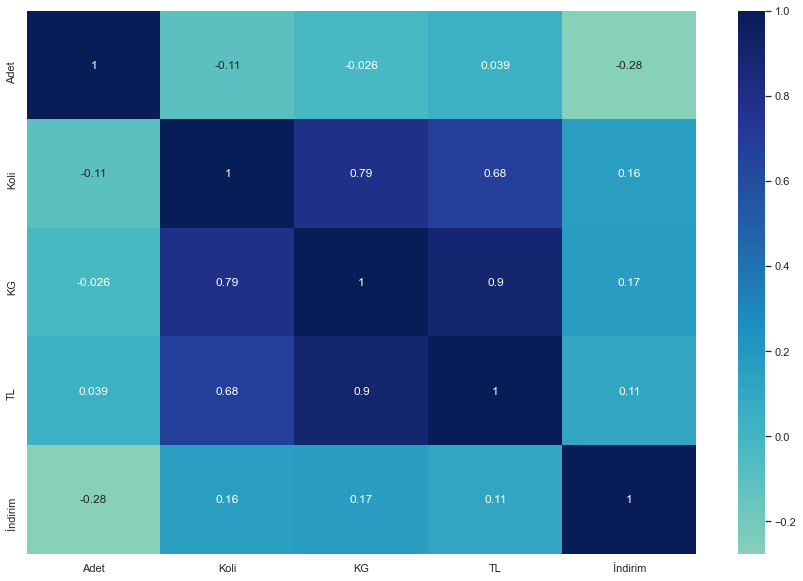

In [75]:
corr = pasifik.loc[:,['Adet','Koli','KG','TL','İndirim']].corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, annot=True, center=0, cmap="YlGnBu")